In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
ds1=pd.read_csv("water_potability.csv")

In [3]:
ds1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
ds1.shape

(3276, 10)

In [5]:
ds2=ds1.drop(['Sulfate','Chloramines','Trihalomethanes','Organic_carbon'],axis='columns')
ds2.shape

(3276, 6)

In [6]:
ds2.head()

,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,NaN,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [7]:
ds2.isnull().sum()

ph              491
Hardness          0
Solids            0
Conductivity      0
Turbidity         0
Potability        0
dtype: int64

In [8]:
ds2["ph"] =ds2["ph"].fillna(ds2["ph"].mean())

In [9]:
ds2.isnull().sum()

ph              0
Hardness        0
Solids          0
Conductivity    0
Turbidity       0
Potability      0
dtype: int64

In [10]:
ds2.shape

(3276, 6)

In [11]:
ds2["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

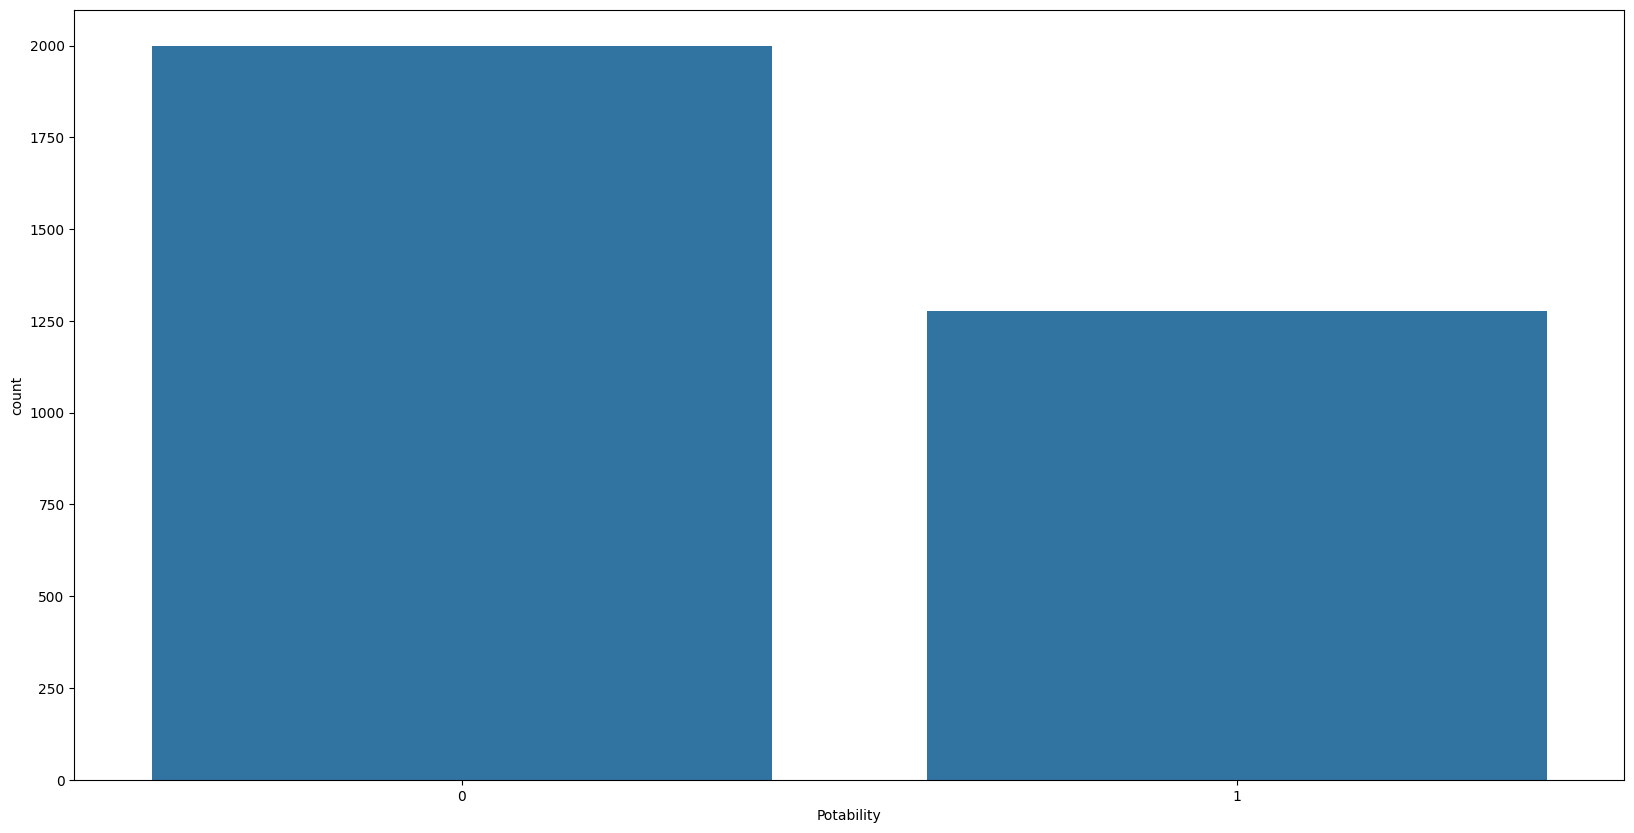

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Potability",data=ds2)

In [13]:
import plotly.express as px
fig=px.pie(ds2,names="Potability",hole=0.4,template="plotly_dark")
fig.show()

In [14]:
ds2[(ds2['Potability'] == 1) & ((ds2['ph'] < 6.5) | (ds2['ph'] > 8.0))].head()
# Get the indices of the rows you want to drop
indices_to_drop = ds2[(ds2['Potability'] == 1) & ((ds2['ph'] < 6.5) | (ds2['ph'] > 8.0))].index
ds3 = ds2.drop(indices_to_drop) # Drop rows based on their indices
ds3.head()


,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,7.080795,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [15]:
ds3.shape


(2662, 6)

In [16]:
ds3[(ds3['Potability'] == 1) & ((ds3['Hardness'] < 50) | (ds2['Hardness'] > 200))].head()
# Get the indices of the rows you want to drop
indices_to_drop = ds3[(ds3['Potability'] == 1) & ((ds3['Hardness'] < 50) & (ds2['Hardness'] > 200))].index
ds4 = ds3.drop(indices_to_drop) # Drop rows based on their indices
ds4.head()


<ipython-input-16-43f8033cb6a2>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-16-43f8033cb6a2>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,7.080795,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [17]:
ds4.shape

(2662, 6)

In [18]:
f3_data = ds4[(ds4['Potability'] == 1) & ((ds4['Solids'] < 5000) | (ds4['Solids'] > 30000))]

# Create a new dataset by dropping the rows with outliers
ds5 = ds4.drop(f3_data.index)

# Display the first few rows of the cleaned dataset
ds5.head()

,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,7.080795,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [19]:
ds5.shape

(2530, 6)

In [20]:

f4_data = ds5[(ds5['Potability'] == 1) & ((ds5['Conductivity'] < 50) | (ds5['Conductivity'] > 600))]

# Create a new dataset by dropping the rows with outliers
ds6 = ds5.drop(f4_data.index)

# Display the first few rows of the cleaned dataset
ds6.head()



,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,7.080795,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [21]:
potable_water = ds6[(ds6['Potability'] == 1)]
print(potable_water)

            ph    Hardness        Solids  Conductivity  Turbidity  Potability
252   7.080795  169.974849  23403.637304    475.573562   2.747313           1
254   7.174135  203.408935  20401.102461    315.549900   3.939896           1
255   7.657991  236.960889  14245.789121    416.624189   2.437296           1
262   6.548021  278.585105  25508.386949    497.321753   3.611860           1
264   6.618011  233.661636  19598.860740    401.669791   4.437696           1
...        ...         ...           ...           ...        ...         ...
3258  6.638411  180.826667   9772.504814    401.111143   5.164057           1
3260  7.080795  134.736856   9000.025591    428.213987   3.699558           1
3268  6.702547  207.321086  17246.920347    329.266002   3.442983           1
3272  7.808856  193.553212  17329.802160    392.449580   2.798243           1
3275  7.874671  195.102299  17404.177061    327.459760   2.309149           1

[519 rows x 6 columns]


In [22]:
ds6["Potability"].value_counts()

Potability
0    1998
1     519
Name: count, dtype: int64

In [23]:
ds6["Potability"].value_counts()

Potability
0    1998
1     519
Name: count, dtype: int64

In [24]:
f5_data = ds6[(ds6['Potability'] == 1) & ((ds6['Turbidity'] < 1) | (ds6['Turbidity'] > 4))]

# Create a new dataset by dropping the rows with outliers
ds7 = ds6.drop(f5_data.index)

# Display the first few rows of the cleaned dataset
ds7.head()

,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,7.080795,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [25]:
ds7["Potability"].value_counts()

Potability
0    1998
1     261
Name: count, dtype: int64

In [26]:
x=ds7.drop("Potability",axis=1)
x.head()


,ph,Hardness,Solids,Conductivity,Turbidity
0,7.080795,204.890455,20791.318981,564.308654,2.963135
1,3.716080,129.422921,18630.057858,592.885359,4.500656
2,8.099124,224.236259,19909.541732,418.606213,3.055934
3,8.316766,214.373394,22018.417441,363.266516,4.628771
4,9.092223,181.101509,17978.986339,398.410813,4.075075


In [27]:
y=ds7.Potability
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [28]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(criterion="gini")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)


0.8849557522123894

In [30]:
import pickle
with open('water_quality_model_rf.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [31]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestClassifier(),x,y,cv=cv)


array([0.88053097, 0.85619469, 0.8539823 , 0.84955752, 0.86725664])

In [32]:
from sklearn.svm import SVC
svm_model= SVC(kernel="rbf")
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)


0.8871681415929203

In [33]:
with open('water_quality_model_svm.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(SVC(),x,y,cv=cv)


array([0.90486726, 0.85176991, 0.88495575, 0.87831858, 0.88053097])

In [35]:
# Combine predictions
rf_preds = rf_model.predict(x_test)
svm_preds = svm_model.predict(x_test)
combined_model = (0.5 * rf_preds)  + (0.5 * svm_preds)


In [36]:
binary_combined_preds = np.round(combined_model)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_combined = accuracy_score(y_test, binary_combined_preds)
print(accuracy_combined)

0.8871681415929203


In [38]:
import pickle
with open('water_quality_model_rf.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)
with open('water_quality_model_svm.pkl', 'rb') as f:
    loaded_model_svm = pickle.load(f)



In [39]:
x=np.array([7.080795, 114.733545, 13677.994040, 524.000355, 3.293848])
x=np.expand_dims(x, axis=0)
y1=loaded_model_rf.predict(x)
y2=loaded_model_svm.predict(x)



In [40]:
print(y1,y2)

[0] [0]


In [41]:
combined_model = (0.5 * rf_preds)  + (0.5 * svm_preds)

In [42]:
binary_combined_preds = np.round(combined_model)
print(binary_combined_preds)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [43]:
import pandas as pd
df = pd.DataFrame(ds7)
data = df[df['Potability'] == 1]

# Display all rows where Potability is 1
print("Rows where Potability is 1:")
print(data)



Rows where Potability is 1:
            ph    Hardness        Solids  Conductivity  Turbidity  Potability
252   7.080795  169.974849  23403.637304    475.573562   2.747313           1
254   7.174135  203.408935  20401.102461    315.549900   3.939896           1
255   7.657991  236.960889  14245.789121    416.624189   2.437296           1
262   6.548021  278.585105  25508.386949    497.321753   3.611860           1
265   7.788055  212.691457  29879.060146    359.569082   3.368757           1
...        ...         ...           ...           ...        ...         ...
3241  6.792655  241.724453   9094.313300    361.107537   1.917754           1
3260  7.080795  134.736856   9000.025591    428.213987   3.699558           1
3268  6.702547  207.321086  17246.920347    329.266002   3.442983           1
3272  7.808856  193.553212  17329.802160    392.449580   2.798243           1
3275  7.874671  195.102299  17404.177061    327.459760   2.309149           1

[261 rows x 6 columns]
